<a href="https://colab.research.google.com/github/baldpanda/dog_breed_classifier/blob/adding-image-generator/dog_breed_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog Breed Classification

Playing with TensorFlow and Neural Networks to build a classifier to predict the breed given an image of a dog. The source of the dataset was Kaggle and the competition related to this task can be found [here](https://www.kaggle.com/c/dog-breed-identification). Storing the training data on Google Drive for easy integration with colab. Using Colab to take advantage of the compute power and I'm not sure my current laptop could cope with this task.

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from google.colab import drive
from PIL import Image
print(tf.VERSION)

1.13.1


In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
st_bernard_image = Image.open('/content/drive/My Drive/dog_breed_classification/dog_breeds/saint_bernard/1b26fc0e227488f288c753c84a88ca6c.jpg')

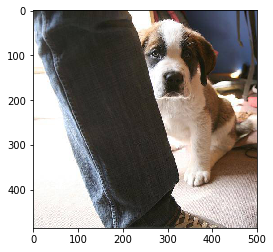

In [4]:
plt.imshow(st_bernard_image)

Using  Keras's ImageDataGenerator to label the images of dogs for training a CNN

In [0]:
train_data_generator = ImageDataGenerator(rescale = 1/255)

In [7]:
train_generator = train_data_generator.flow_from_directory(
    '/content/drive/My Drive/dog_breed_classification/dog_breeds',
    target_size=(300,300),
    batch_size=269,
    class_mode='sparse'
)

Found 10222 images belonging to 120 classes.


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(120, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Running for 1 epoch to test saving of model into and loading from Google Drive.

In [11]:
history = model.fit_generator(train_generator, steps_per_epoch=38, epochs=1, verbose=2)

 - 3374s - loss: 4.9193 - acc: 0.0137


In [0]:
# model.save("/content/drive/My Drive/dog_breed_classification/model_test_one_epoch.h5")

In [6]:
model = tf.keras.models.load_model("/content/drive/My Drive/dog_breed_classification/model_test_one_epoch.h5")

Instructions for updating:
Colocations handled automatically by placer.


## Testing one epoch on training image of St. Bernard showed before

In [0]:
# reshaping and normalizing image to same format as training data
st_bernard_image_scaled = st_bernard_image.resize((300,300), Image.NEAREST)
np_st_bernard = np.array(st_bernard_image_scaled)
np_st_bernard = np_st_bernard / 255.0
np_st_bernard = np_st_bernard.reshape(1, 300, 300, 3)

In [8]:
model.predict(np_st_bernard).argmax(axis=-1)[0]

20

# Notes 

Machine interrupted whilst training. The first epoch took approx 3000 secs = 50 mins

=> The training would take 12.5 hours to train on standard machine. Having another go on a TPU enabled one (fingers crossed)

Also, on first epoch the model achieved an accuracy of just slightly better than guessing the same label (i.e. St. Bernard) for all the images